In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [17]:
y = pd.read_csv('data/actual.csv')
train = pd.read_csv('data/data_set_ALL_AML_train.csv')
test = pd.read_csv('data/data_set_ALL_AML_independent.csv')
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [18]:
# Drop the call collumns from both data sets
call_cols_train = [col for col in train.columns if 'call' in col]
train = train.drop(call_cols_train, axis = 1)

call_cols_test = [col for col in test.columns if 'call' in col]
test = test.drop(call_cols_test, axis = 1)

In [19]:
# Drop "Gene Description" and "Gene Accession Number"
cols_to_drop = ['Gene Description', 'Gene Accession Number']
train = train.drop(cols_to_drop, axis = 1)
test = test.drop(cols_to_drop, axis = 1)

# Transpose both data_sets
train = train.T
test = test.T

train.index = pd.to_numeric(train.index) 
test.index = pd.to_numeric(test.index) 
train.sort_index(inplace=True) 
test.sort_index(inplace=True)

In [20]:
train

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


In [21]:
test

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81
44,-146,-74,170,174,-32,-318,8,-152,-148,17,...,180,690,-142,249,-220,354,-42,-100,45,-108
45,-187,-187,312,142,114,-148,-184,-133,12,97,...,37,125,-185,13,-148,304,-1,-207,112,-190
46,-56,-43,43,177,-116,-184,-105,-62,0,-40,...,103,593,0,-24,18,625,173,63,63,-62
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [22]:
# Check for nulls and nan in the training set
print(train.isnull().values.any())
print(train.isnull().sum().sum())

False
0


In [23]:
# Check for nulls and nan in the test set
print(test.isnull().values.any())
print(train.isnull().sum().sum())

False
0


In [32]:
y

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
...,...,...
67,68,ALL
68,69,ALL
69,70,ALL
70,71,ALL


In [24]:
y['cancer'].value_counts() 

ALL    47
AML    25
Name: cancer, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: AML || 1: ALL)')

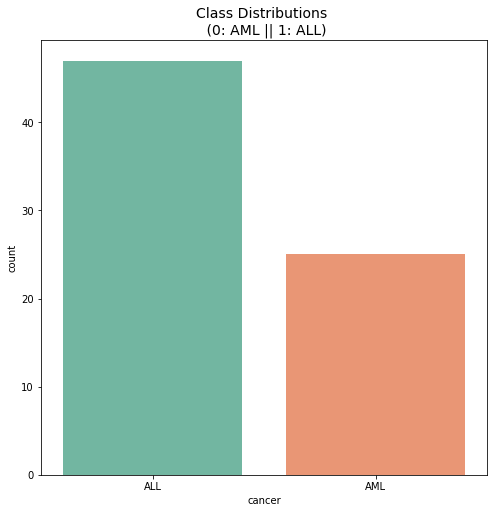

In [25]:
plt.figure(figsize=(8,8))
colors = ["AML", "ALL"]
sns.countplot('cancer', data=y, palette = "Set2")
plt.title('Class Distributions \n (0: AML || 1: ALL)', fontsize=14)

In [26]:
# Split the data sets into X_train, X_test, y_training, y_test and then combine (X_train, y_train), (X_test, y_test)
X_train = train.reset_index(drop=True)
y_train = y[y.patient <= 38].reset_index(drop=True)

X_train = pd.concat([y_train, X_train], axis=1)

X_test = test.reset_index(drop=True)
y_test= y[y.patient > 38].reset_index(drop=True)

X_test = pd.concat([y_test, X_test], axis=1)

In [30]:
X_train

,patient,cancer,0,1,2,3,4,5,6,7,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,1,ALL,-214,-153,-58,88,-295,-558,199,-176,...,185,511,-125,389,-37,793,329,36,191,-37
1,2,ALL,-139,-73,-1,283,-264,-400,-330,-168,...,169,837,-36,442,-17,782,295,11,76,-14
2,3,ALL,-76,-49,-307,309,-376,-650,33,-367,...,315,1199,33,168,52,1138,777,41,228,-41
3,4,ALL,-135,-114,265,12,-419,-585,158,-253,...,240,835,218,174,-110,627,170,-50,126,-91
4,5,ALL,-106,-125,-76,168,-230,-284,4,-122,...,156,649,57,504,-26,250,314,14,56,-25
5,6,ALL,-138,-85,215,71,-272,-558,67,-186,...,115,1221,-76,172,-74,645,341,26,193,-53
6,7,ALL,-72,-144,238,55,-399,-551,131,-179,...,30,819,-178,151,-18,1140,482,10,369,-42
7,8,ALL,-413,-260,7,-2,-541,-790,-275,-463,...,289,629,-86,302,23,1799,446,59,781,20
8,9,ALL,5,-127,106,268,-210,-535,0,-174,...,356,980,6,177,-12,758,385,115,244,-39
9,10,ALL,-88,-105,42,219,-178,-246,328,-148,...,42,986,26,101,21,570,359,9,171,7


In [31]:
X_test

,patient,cancer,0,1,2,3,4,5,6,7,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,39,ALL,-342,-200,41,328,-224,-427,-656,-292,...,277,1023,67,214,-135,1074,475,48,168,-70
1,40,ALL,-87,-248,262,295,-226,-493,367,-452,...,83,529,-295,352,-67,67,263,-33,-33,-21
2,41,ALL,-62,-23,-7,142,-233,-284,-167,-97,...,129,383,46,104,15,245,164,84,100,-18
3,42,ALL,22,-153,17,276,-211,-250,55,-141,...,413,399,16,558,24,893,297,6,1971,-42
4,43,ALL,86,-36,-141,252,-201,-384,-420,-197,...,341,91,-84,615,-52,1235,9,7,1545,-81
5,44,ALL,-146,-74,170,174,-32,-318,8,-152,...,180,690,-142,249,-220,354,-42,-100,45,-108
6,45,ALL,-187,-187,312,142,114,-148,-184,-133,...,37,125,-185,13,-148,304,-1,-207,112,-190
7,46,ALL,-56,-43,43,177,-116,-184,-105,-62,...,103,593,0,-24,18,625,173,63,63,-62
8,47,ALL,-243,-218,-163,182,-289,-268,-285,-172,...,174,277,6,81,2,722,170,0,510,-73
9,48,ALL,-130,-177,-28,266,-170,-326,-222,-93,...,233,643,51,450,-46,612,370,29,333,-19


In [27]:
X_train['cancer'].value_counts()

ALL    27
AML    11
Name: cancer, dtype: int64

In [28]:
X_test['cancer'].value_counts() 

ALL    20
AML    14
Name: cancer, dtype: int64

In [29]:
sample = X_train.iloc[:,2:].sample(n=100, axis=1)
sample["cancer"] = X_train.cancer
sample.describe().round()

,985,6593,5917,2776,4327,4050,6781,4645,3188,6726,...,3639,2563,4690,5726,4543,6874,4407,7018,3334,1530
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,178.0,-115.0,111.0,18.0,3428.0,309.0,-21.0,372.0,252.0,232.0,...,-268.0,127.0,262.0,765.0,583.0,-149.0,-242.0,1570.0,-28.0,9.0
std,140.0,64.0,50.0,63.0,2444.0,480.0,87.0,137.0,431.0,125.0,...,437.0,117.0,104.0,238.0,548.0,132.0,158.0,1202.0,75.0,115.0
min,-96.0,-291.0,3.0,-82.0,99.0,-72.0,-187.0,83.0,-106.0,-78.0,...,-960.0,-65.0,72.0,319.0,-515.0,-577.0,-731.0,426.0,-184.0,-147.0
25%,85.0,-143.0,79.0,-32.0,1566.0,57.0,-78.0,275.0,4.0,150.0,...,-586.0,49.0,186.0,606.0,264.0,-189.0,-302.0,870.0,-66.0,-79.0
50%,154.0,-104.0,103.0,14.0,2736.0,124.0,-28.0,366.0,30.0,238.0,...,-316.0,98.0,263.0,703.0,462.0,-126.0,-208.0,1289.0,-24.0,-29.0
75%,251.0,-79.0,142.0,54.0,5450.0,355.0,15.0,462.0,410.0,317.0,...,-125.0,196.0,354.0,926.0,904.0,-55.0,-128.0,1553.0,7.0,108.0
max,492.0,-10.0,233.0,197.0,7782.0,2312.0,228.0,713.0,1563.0,486.0,...,967.0,444.0,444.0,1386.0,1827.0,16.0,-22.0,5916.0,135.0,240.0
